In [1]:
def find_in_fasta(genome, seq, start, length):
    end = start + length
    fai = genome + '.fai'
    f1 = open(fai, 'r')
    f2 = open(genome, 'r')
    
    for line in f1:
        ln = line.strip()
        li = ln.split()
        if li[0] == seq:
            b = int(li[2]) + start + (int((start - 1)/int(li[3])) * (int(li[4]) - int(li[3]))) - 1
            e = int(li[2]) + end + (int((end - 1)/int(li[3])) * (int(li[4]) - int(li[3]))) - 1
            f2.seek(b)
            res = f2.read(e - b).replace('\n', '')

    f1.close()
    f2.close()
    return(res)

In [3]:
genome_file = open('Chinese_Spring.fasta', 'r')
counter = 0

for line in genome_file:
    print(line.strip())
    counter += 1
    if counter > 3:
        break

>chr1A
CTAAACCCTAAACCCTAAACCCTAAACCCTAAACCCCTAACCCTAAACCCTAACCAAAAC
CCTAAACCCTAAACCCCTAAACCCTAAACCCTAACCTAAACCTACCTAAACCATACATTG
TTCCATTGGCCAGAGGCTGTTCACCTTGGAGACCTGATGCGGTTATGAGTACGACCGGGC


In [7]:
find_in_fasta('Chinese_Spring.fasta', 'chr1A', 61, 60)

'CCTAAACCCTAAACCCCTAAACCCTAAACCCTAACCTAAACCTACCTAAACCATACATTG'

In [80]:
import pandas as pd

In [81]:
snp_df = pd.read_excel('Additional file 2.xlsx')

In [82]:
snp_df.head()

,Reference,Position,Identifier,Reference allele,Description code,Type
0,chr1A,508800,IAB15001,C,G_gap_SNP_other_4026,G
1,chr1A,799201,IAB30001,T,G_gap_SNP_OTHER_13922,G
2,chr1A,1145442,IAB00001,G,B_BS00000713_51.1_10.1186s12870-017-1167-3_ESM8,B
3,chr1A,1172042,IAB30002,C,D_Functional_SNP_MODERATE_7501,D
4,chr1A,1211885,IAB30003,C,D_Functional_SNP_MODERATE_7502,D


In [83]:
sequences = []

for i in range(len(snp_df)):
    chr = snp_df.loc[i]['Reference']
    pos = snp_df.loc[i]['Position']
    seq = find_in_fasta('Chinese_Spring.fasta', chr, pos - 100, 201)
    out = seq[:100] + '[' + seq[100] + ']' + seq[101:]
    sequences.append(out)

snp_df['Sequences'] = sequences
snp_df.head()

,Reference,Position,Identifier,Reference allele,Description code,Type,Sequences
0,chr1A,508800,IAB15001,C,G_gap_SNP_other_4026,G,CAGTACGAATCAAGTTGTGCATATTTGCTGTTGGCATGAACCACAT...
1,chr1A,799201,IAB30001,T,G_gap_SNP_OTHER_13922,G,CCAATCTAGGCACCCTTCAATGTCAACATTTCCATTAAAACTTGGG...
2,chr1A,1145442,IAB00001,G,B_BS00000713_51.1_10.1186s12870-017-1167-3_ESM8,B,GATCTGAATCTGATGTGGGTTCAGGCCGGATCTGCCCCTTCTTGGA...
3,chr1A,1172042,IAB30002,C,D_Functional_SNP_MODERATE_7501,D,CTTAGTTTTTTTTCTTCCCATCACTCTGCATCTTATCTCTTGCCTG...
4,chr1A,1211885,IAB30003,C,D_Functional_SNP_MODERATE_7502,D,TTGTGGTTCTCCTTGCCCGCGCTTCCTTCAGAAGGATGATCTTCTT...


In [86]:
# check the results
counter = 0

for i in range(len(snp_df)):
    ref = snp_df.iloc[i]['Reference allele']
    alt = snp_df.iloc[i]['Sequences'].split('[')[1].split(']')[0]
    if ref.upper() == alt.upper():
        counter += 1
    else:
        print(snp_df.iloc[i])

print(len(snp_df), counter)

60001 60001


In [87]:
snp_df.to_excel('60K_snp_sequences.xlsx')

In [98]:
def gc_percent(seq):
    seq = seq.upper().replace('N', '')
    gc_count = 0
    
    for i in range(len(seq)):
        if seq[i] in ['G', 'C']:
            gc_count += 1
    
    gc_share = gc_count/len(seq)
    return(100 * gc_share)

In [99]:
# Calculating %GC for all probes
GC = []

for i in range(len(snp_df)):
    probe_seq = snp_df.iloc[i]['Sequences']
    GC.append(gc_percent(probe_seq.replace('[', '').replace(']', '')))

snp_df['GC%'] = GC
snp_df.head()

,Reference,Position,Identifier,Reference allele,Description code,Type,Sequences,GC%,Set
0,chr1A,508800,IAB15001,C,G_gap_SNP_other_4026,G,CAGTACGAATCAAGTTGTGCATATTTGCTGTTGGCATGAACCACAT...,46.766169,60K
1,chr1A,799201,IAB30001,T,G_gap_SNP_OTHER_13922,G,CCAATCTAGGCACCCTTCAATGTCAACATTTCCATTAAAACTTGGG...,41.791045,60K
2,chr1A,1145442,IAB00001,G,B_BS00000713_51.1_10.1186s12870-017-1167-3_ESM8,B,GATCTGAATCTGATGTGGGTTCAGGCCGGATCTGCCCCTTCTTGGA...,55.721393,60K
3,chr1A,1172042,IAB30002,C,D_Functional_SNP_MODERATE_7501,D,CTTAGTTTTTTTTCTTCCCATCACTCTGCATCTTATCTCTTGCCTG...,45.771144,16K
4,chr1A,1211885,IAB30003,C,D_Functional_SNP_MODERATE_7502,D,TTGTGGTTCTCCTTGCCCGCGCTTCCTTCAGAAGGATGATCTTCTT...,58.706468,3K


In [100]:
snp_df.to_excel('60K_snp_sequences.xlsx')

Now we will add l the labels that indicate the SNP set:

In [90]:
labels = ['60K'] * len(snp_df)

In [91]:
df_16k_set = pd.read_csv(r'Genotypes_seqSNP+KASP_16495sites.hmp.txt', sep='\t')
for i in range(len(labels)):
    if snp_df.iloc[i]['Identifier'] in df_16k_set['rs#'].to_list():
        labels[i] = '16K'
set(labels)

{'16K', '60K'}

In [92]:
df_9k_set = pd.read_csv(r'Genotypes_seqSNP+KASP_16495sites_90%call.hmp.txt', sep='\t')
for i in range(len(labels)):
    if snp_df.iloc[i]['Identifier'] in df_9k_set['rs#'].to_list():
        labels[i] = '9K'
set(labels)

{'16K', '60K', '9K'}

In [93]:
df_7k_set = pd.read_csv(r'Genotypes_seqSNP+KASP_16495sites_90%call_hz10%max.hmp.txt', sep='\t')
for i in range(len(labels)):
    if snp_df.iloc[i]['Identifier'] in df_7k_set['rs#'].to_list():
        labels[i] = '7K'
set(labels)

{'16K', '60K', '7K', '9K'}

In [94]:
df_3k_set = pd.read_csv(r'Genotypes_seqSNP+KASP_16495sites_90%call_hz10%max_maf5%min.hmp.txt', sep='\t')
for i in range(len(labels)):
    if snp_df.iloc[i]['Identifier'] in df_3k_set['rs#'].to_list():
        labels[i] = '3K'
set(labels)

{'16K', '3K', '60K', '7K', '9K'}

In [95]:
snp_df['Set'] = labels
snp_df.head()

,Reference,Position,Identifier,Reference allele,Description code,Type,Sequences,GC%,Set
0,chr1A,508800,IAB15001,C,G_gap_SNP_other_4026,G,CAGTACGAATCAAGTTGTGCATATTTGCTGTTGGCATGAACCACAT...,46.766169,60K
1,chr1A,799201,IAB30001,T,G_gap_SNP_OTHER_13922,G,CCAATCTAGGCACCCTTCAATGTCAACATTTCCATTAAAACTTGGG...,41.791045,60K
2,chr1A,1145442,IAB00001,G,B_BS00000713_51.1_10.1186s12870-017-1167-3_ESM8,B,GATCTGAATCTGATGTGGGTTCAGGCCGGATCTGCCCCTTCTTGGA...,55.721393,60K
3,chr1A,1172042,IAB30002,C,D_Functional_SNP_MODERATE_7501,D,CTTAGTTTTTTTTCTTCCCATCACTCTGCATCTTATCTCTTGCCTG...,45.771144,16K
4,chr1A,1211885,IAB30003,C,D_Functional_SNP_MODERATE_7502,D,TTGTGGTTCTCCTTGCCCGCGCTTCCTTCAGAAGGATGATCTTCTT...,58.706468,3K


In [96]:
snp_df.to_excel('60K_snp_sequences.xlsx')

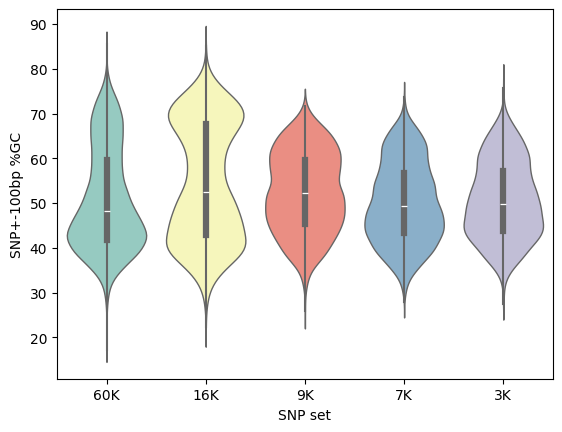

In [101]:
#! pip install seaborn
import seaborn as sns
import matplotlib.pyplot as plt

ax = sns.violinplot(data=snp_df, x="Set", y=r"GC%", inner="box", order=['60K', '16K', '9K', '7K', '3K'], hue='Set', bw_adjust=1, linewidth=1, palette="Set3", 
               density_norm='area')
ax.set_xlabel(r"SNP set")
ax.set_ylabel(r"SNP+-100bp %GC")
plt.savefig('201bp_fragment_GC_content.png', dpi=400)
plt.savefig('201bp_fragment_GC_content.svg')

In [103]:
# making fastq file for mapping fragments to new version of genome

f3 = open('dummy60k.fq', 'w')

for i in range(snp_df.shape[0]):
    name = snp_df.iloc[i]['Identifier']
    seq = snp_df.iloc[i]['Sequences']
    seq_joint = seq.replace('[', '').replace(']', '')
    for j in range(len(seq_joint)):
        if seq_joint[j] != 'N':
            break
    seq_forward = seq_joint[j:]
    seq_reverse = seq_forward[::-1]
    for k in range(len(seq_reverse)):
        if seq_reverse[k] != 'N':
            break
    seq_reverse = seq_reverse[k:]
    seq_out = seq_reverse[::-1]
    out = '@' + name + ':'  + str(j) + ':' + str(len(seq_out)) + '\n' + seq_out + '\n+\n' + ('J' * len(seq_out)) + '\n'
    f3.write(out)

f3.close()

Here we make alignment to genome using:

bwa fastmap ref.fa reads.fq > aln.txt

In [105]:
# from alignment we get coordinates of SNPs in RefSeq2.1 genome

# import pandas as pd
import io   

f4 = open('aln60k.txt', 'r')
snp_names = []
number_of_matches = []
snp_positions_in_new_genome = []

for line in f4:
    if line[:2] == 'SQ':
        line = line.strip()
        columns = line.split()
        seq_info = columns[1].split(':')
        name = seq_info[0]
        start1 = int(seq_info[1])
        data_of_matches = ''
    if line[:2] == 'EM':
        columns = line.strip().split()
        if len(columns) < 25:
            for l in range(25 - len(columns)):
                columns.append('')
        data_of_matches += '\t'.join(columns) + '\n'
    if line[:2] == '//':
        df = pd.read_csv(io.StringIO(data_of_matches), sep='\t', header=None)
        df[0] = df[2] - df[1]
        df.sort_values(by=0, ascending=False, inplace=True, axis=0)
        start2 = df.iloc[0][1]
        positions = ''
        for m in range(df.iloc[0][3]):
            coords_text = df.iloc[0][4 + m]
            if coords_text == "*":
               positions = 'Too many positions found '
               break
            coords = coords_text.split(':')
            chrom = coords[0]
            pos = int(coords[1]) - start1 - start2 + 100
            positions += chrom + ':' + str(pos) + '|'
        snp_names.append(name)
        number_of_matches.append(df.iloc[0][3])
        snp_positions_in_new_genome.append(positions[:-1])

f4.close()

In [107]:
df_mapping_to_new_genome = pd.DataFrame()
df_mapping_to_new_genome['Identifier'] = snp_names
df_mapping_to_new_genome['Matches_in_genome'] = number_of_matches
df_mapping_to_new_genome['RefSeq2.1_coordinates'] = snp_positions_in_new_genome
df_mapping_to_new_genome.head()

,Identifier,Matches_in_genome,RefSeq2.1_coordinates
0,IAB15001,1,Chr1A:508800
1,IAB30001,1,Chr1A:800459
2,IAB00001,1,Chr1A:1143935
3,IAB30002,1,Chr1A:1169887
4,IAB30003,1,Chr1A:1209730


In [108]:
df_mapping_to_new_genome.set_index('Identifier', inplace=True)

In [109]:
snp_df.set_index('Identifier', inplace=True)

In [110]:
final_df = pd.concat((snp_df, df_mapping_to_new_genome), ignore_index=False, axis=1)
final_df

,Reference,Position,Reference allele,Description code,Type,Sequences,GC%,Set,Matches_in_genome,RefSeq2.1_coordinates
Identifier,,,,,,,,,,
IAB15001,chr1A,508800,C,G_gap_SNP_other_4026,G,CAGTACGAATCAAGTTGTGCATATTTGCTGTTGGCATGAACCACAT...,46.766169,60K,1,Chr1A:508800
IAB30001,chr1A,799201,T,G_gap_SNP_OTHER_13922,G,CCAATCTAGGCACCCTTCAATGTCAACATTTCCATTAAAACTTGGG...,41.791045,60K,1,Chr1A:800459
IAB00001,chr1A,1145442,G,B_BS00000713_51.1_10.1186s12870-017-1167-3_ESM8,B,GATCTGAATCTGATGTGGGTTCAGGCCGGATCTGCCCCTTCTTGGA...,55.721393,60K,1,Chr1A:1143935
IAB30002,chr1A,1172042,C,D_Functional_SNP_MODERATE_7501,D,CTTAGTTTTTTTTCTTCCCATCACTCTGCATCTTATCTCTTGCCTG...,45.771144,16K,1,Chr1A:1169887
IAB30003,chr1A,1211885,C,D_Functional_SNP_MODERATE_7502,D,TTGTGGTTCTCCTTGCCCGCGCTTCCTTCAGAAGGATGATCTTCTT...,58.706468,3K,1,Chr1A:1209730
...,...,...,...,...,...,...,...,...,...,...
IAB59997,chrUn,432096778,C,G_gap_SNP_OTHER_28139,G,GCAGATCAAAGTAACTAAGTGACAATATCTGCATCATTCCTTCAAC...,36.815920,60K,1,Chr6A:618429827
IAB59998,chrUn,432523233,G,G_gap_SNP_OTHER_28140,G,GTTATTCAATCCTTAGAATAGGCAGGGGTGGCCAAGTTTCGACCGC...,46.268657,16K,1,ChrUnknown:4075596281
IAB59999,chrUn,437502835,G,D_Functional_SNP_MODERATE_22499,D,GCATCAGATACCATACCTCGTGAGCTCACCCACTTTGGGCACCAGG...,55.721393,60K,1,ChrUnknown:323958077


In [111]:
final_df.to_excel('60K_snp_sequences_with_new_coords.xlsx')

Making fastq file with +-50bp around each of 60k SNP:

In [1]:
import pandas as pd
snp_df = pd.read_excel('60K_snp_sequences_with_new_coords.xlsx')

In [2]:
# making fastq file for mapping fragments to new version of genome

f3 = open('dummy60k+-50bp.fq', 'w')

for i in range(snp_df.shape[0]):
    name = snp_df.iloc[i]['Identifier']
    seq = snp_df.iloc[i]['Sequences']
    seq_joint = seq.replace('[', '').replace(']', '')
    for j in range(len(seq_joint)):
        if seq_joint[j] != 'N':
            break
    seq_forward = seq_joint[j:]
    seq_reverse = seq_forward[::-1]
    for k in range(len(seq_reverse)):
        if seq_reverse[k] != 'N':
            break
    seq_reverse = seq_reverse[k:]
    seq_out = seq_reverse[::-1]
    seq_out = seq_out[50:-50]
    out = '@' + name + ':'  + str(j + 50) + ':' + str(len(seq_out)) + '\n' + seq_out + '\n+\n' + ('J' * len(seq_out)) + '\n'
    f3.write(out)

f3.close()

Here we make alignment:

bwa fastmap ref.fa reads.fq > aln.txt

In [4]:
# from alignment we get coordinates of SNPs in RefSeq2.1 genome

import io   

f4 = open('aln60k+-50bp.txt', 'r')
snp_names = []
number_of_matches = []
snp_positions_in_new_genome = []

for line in f4:
    if line.strip == '':
        continue
    if line[:2] == 'SQ':
        line = line.strip()
        columns = line.split()
        seq_info = columns[1].split(':')
        name = seq_info[0]
        start1 = int(seq_info[1])
        data_of_matches = ''
    if line[:2] == 'EM':
        columns = line.strip().split()
        if len(columns) < 25:
            for l in range(25 - len(columns)):
                columns.append('')
        data_of_matches += '\t'.join(columns) + '\n'
    if line[:2] == '//':
        try:
            df = pd.read_csv(io.StringIO(data_of_matches), sep='\t', header=None)
        except:
            snp_names.append(name)
            number_of_matches.append(0)
            snp_positions_in_new_genome.append('No matches found')
            continue
        df[0] = df[2] - df[1]
        df.sort_values(by=0, ascending=False, inplace=True, axis=0)
        start2 = df.iloc[0][1]
        positions = ''
        for m in range(df.iloc[0][3]):
            coords_text = df.iloc[0][4 + m]
            if coords_text == "*":
               positions = 'Too many positions found '
               break
            coords = coords_text.split(':')
            chrom = coords[0]
            pos = int(coords[1]) - start1 - start2 + 50
            positions += chrom + ':' + str(pos) + '|'
        snp_names.append(name)
        number_of_matches.append(df.iloc[0][3])
        snp_positions_in_new_genome.append(positions[:-1])

f4.close()

In [5]:
df_mapping_to_new_genome = pd.DataFrame()
df_mapping_to_new_genome['Identifier'] = snp_names
df_mapping_to_new_genome['Matches for SNP+-50bp'] = number_of_matches
df_mapping_to_new_genome.set_index('Identifier', inplace=True)
df_mapping_to_new_genome.head()

,Matches for SNP+-50bp
Identifier,
IAB15001,1
IAB30001,1
IAB00001,1
IAB30002,1
IAB30003,1


In [6]:
snp_df.set_index('Identifier', inplace=True)
snp_df.head()

,Reference,Position,Reference allele,Description code,Type,Sequences,GC%,Set,Matches_in_genome,RefSeq2.1_coordinates
Identifier,,,,,,,,,,
IAB15001,chr1A,508800,C,G_gap_SNP_other_4026,G,CAGTACGAATCAAGTTGTGCATATTTGCTGTTGGCATGAACCACAT...,46.766169,60K,1,Chr1A:508800
IAB30001,chr1A,799201,T,G_gap_SNP_OTHER_13922,G,CCAATCTAGGCACCCTTCAATGTCAACATTTCCATTAAAACTTGGG...,41.791045,60K,1,Chr1A:800459
IAB00001,chr1A,1145442,G,B_BS00000713_51.1_10.1186s12870-017-1167-3_ESM8,B,GATCTGAATCTGATGTGGGTTCAGGCCGGATCTGCCCCTTCTTGGA...,55.721393,60K,1,Chr1A:1143935
IAB30002,chr1A,1172042,C,D_Functional_SNP_MODERATE_7501,D,CTTAGTTTTTTTTCTTCCCATCACTCTGCATCTTATCTCTTGCCTG...,45.771144,16K,1,Chr1A:1169887
IAB30003,chr1A,1211885,C,D_Functional_SNP_MODERATE_7502,D,TTGTGGTTCTCCTTGCCCGCGCTTCCTTCAGAAGGATGATCTTCTT...,58.706468,3K,1,Chr1A:1209730


In [7]:
final_df = pd.concat((snp_df, df_mapping_to_new_genome), ignore_index=False, axis=1)
final_df.head()

,Reference,Position,Reference allele,Description code,Type,Sequences,GC%,Set,Matches_in_genome,RefSeq2.1_coordinates,Matches for SNP+-50bp
Identifier,,,,,,,,,,,
IAB15001,chr1A,508800,C,G_gap_SNP_other_4026,G,CAGTACGAATCAAGTTGTGCATATTTGCTGTTGGCATGAACCACAT...,46.766169,60K,1,Chr1A:508800,1
IAB30001,chr1A,799201,T,G_gap_SNP_OTHER_13922,G,CCAATCTAGGCACCCTTCAATGTCAACATTTCCATTAAAACTTGGG...,41.791045,60K,1,Chr1A:800459,1
IAB00001,chr1A,1145442,G,B_BS00000713_51.1_10.1186s12870-017-1167-3_ESM8,B,GATCTGAATCTGATGTGGGTTCAGGCCGGATCTGCCCCTTCTTGGA...,55.721393,60K,1,Chr1A:1143935,1
IAB30002,chr1A,1172042,C,D_Functional_SNP_MODERATE_7501,D,CTTAGTTTTTTTTCTTCCCATCACTCTGCATCTTATCTCTTGCCTG...,45.771144,16K,1,Chr1A:1169887,1
IAB30003,chr1A,1211885,C,D_Functional_SNP_MODERATE_7502,D,TTGTGGTTCTCCTTGCCCGCGCTTCCTTCAGAAGGATGATCTTCTT...,58.706468,3K,1,Chr1A:1209730,1


In [8]:
final_df.to_excel('60K_snp_sequences_with_new_coords_+-50bp.xlsx')

In [9]:
final_df['Exact matches'] = ['multiple' if (n == 0) else ('single' if n == 1 else 'multiple') for n in final_df['Matches for SNP+-50bp']]
final_df

,Reference,Position,Reference allele,Description code,Type,Sequences,GC%,Set,Matches_in_genome,RefSeq2.1_coordinates,Matches for SNP+-50bp,Exact matches
Identifier,,,,,,,,,,,,
IAB15001,chr1A,508800,C,G_gap_SNP_other_4026,G,CAGTACGAATCAAGTTGTGCATATTTGCTGTTGGCATGAACCACAT...,46.766169,60K,1,Chr1A:508800,1,single
IAB30001,chr1A,799201,T,G_gap_SNP_OTHER_13922,G,CCAATCTAGGCACCCTTCAATGTCAACATTTCCATTAAAACTTGGG...,41.791045,60K,1,Chr1A:800459,1,single
IAB00001,chr1A,1145442,G,B_BS00000713_51.1_10.1186s12870-017-1167-3_ESM8,B,GATCTGAATCTGATGTGGGTTCAGGCCGGATCTGCCCCTTCTTGGA...,55.721393,60K,1,Chr1A:1143935,1,single
IAB30002,chr1A,1172042,C,D_Functional_SNP_MODERATE_7501,D,CTTAGTTTTTTTTCTTCCCATCACTCTGCATCTTATCTCTTGCCTG...,45.771144,16K,1,Chr1A:1169887,1,single
IAB30003,chr1A,1211885,C,D_Functional_SNP_MODERATE_7502,D,TTGTGGTTCTCCTTGCCCGCGCTTCCTTCAGAAGGATGATCTTCTT...,58.706468,3K,1,Chr1A:1209730,1,single
...,...,...,...,...,...,...,...,...,...,...,...,...
IAB59997,chrUn,432096778,C,G_gap_SNP_OTHER_28139,G,GCAGATCAAAGTAACTAAGTGACAATATCTGCATCATTCCTTCAAC...,36.815920,60K,1,Chr6A:618429827,1,single
IAB59998,chrUn,432523233,G,G_gap_SNP_OTHER_28140,G,GTTATTCAATCCTTAGAATAGGCAGGGGTGGCCAAGTTTCGACCGC...,46.268657,16K,1,ChrUnknown:4075596281,1,single
IAB59999,chrUn,437502835,G,D_Functional_SNP_MODERATE_22499,D,GCATCAGATACCATACCTCGTGAGCTCACCCACTTTGGGCACCAGG...,55.721393,60K,1,ChrUnknown:323958077,1,single


In [10]:
sorted_df_final = final_df.sort_values('Set', ascending=False)
custom_order = ['60K', '16K', '9K', '7K', '3K']
sorted_df_final['Set'] = pd.Categorical(sorted_df_final['Set'], categories=custom_order, ordered=True)
sorted_df_final.sort_values(by='Set', inplace=True)

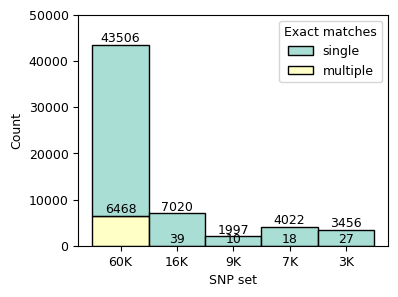

In [11]:
import seaborn as sns
import matplotlib.pyplot as plt

# set size of plot and font
plt.rcParams.update({'font.size': 9})
plt.figure(figsize=(4, 3))
plt.ylim(0, 50000)

ax = sns.histplot(data=sorted_df_final, x='Set', hue='Exact matches', palette="Set3", multiple="stack")
ax.bar_label(ax.containers[0])
ax.bar_label(ax.containers[1])
ax.set_xlabel(r"SNP set")
plt.savefig('matches_in_genome_+-50bp.png', dpi=400, bbox_inches='tight')
plt.savefig('matches_in_genome_+-50bp.svg', bbox_inches='tight')

In [12]:
# We check if probes are present within +-100 bp fragments
# High-specificity probes
# Normal-specificity probes

df_hs_probes = pd.read_excel('Additional file 9.xlsx', sheet_name='High-specificity probes')
df_ns_probes = pd.read_excel('Additional file 9.xlsx', sheet_name='Normal-specificity probes')
df_all_probes = pd.concat([df_hs_probes, df_ns_probes], ignore_index=True)
df_all_probes.head()

,Chromosome,Start,Stop,Strand,Name,Sequence,Tm,Genome_Matches,Masked_Bases
0,chr1A_part1,1171980,1172020,+,IAB30002,TTGCCTGAAGAGCAGTGATACAGAAAATAGCATTTCATTC,51.706,1,0
1,chr1A_part1,1211830,1211870,+,IAB30003,GGTGCGATGAAGCGGTGGCCATATGGCCATTCGCGTATCC,61.380,1,0
2,chr1A_part1,1211907,1211947,-,IAB30003,CCAACGTGGAAGCGGTCGGCGACGTGGCAGCAGCAGCAGT,65.869,1,0
3,chr1A_part1,2162494,2162534,-,IAB15002,CTGCGTCACCGCGCAGCTGGTGACGGCGACCAGTGGCGCC,68.431,1,0
4,chr1A_part1,2837003,2837043,+,IAB30008,TACAGTTACTGGGCAACCAAACATCCTTGCTTGATTGGAA,54.575,1,0


In [13]:
def rev_comp(seq):
    seq = seq.upper()
    seq = seq[::-1]
    translation_table = str.maketrans('ATGCN', 'TACGN')
    out = seq.translate(translation_table)
    return(out)

In [14]:
final_df.head()

,Reference,Position,Reference allele,Description code,Type,Sequences,GC%,Set,Matches_in_genome,RefSeq2.1_coordinates,Matches for SNP+-50bp,Exact matches
Identifier,,,,,,,,,,,,
IAB15001,chr1A,508800,C,G_gap_SNP_other_4026,G,CAGTACGAATCAAGTTGTGCATATTTGCTGTTGGCATGAACCACAT...,46.766169,60K,1,Chr1A:508800,1,single
IAB30001,chr1A,799201,T,G_gap_SNP_OTHER_13922,G,CCAATCTAGGCACCCTTCAATGTCAACATTTCCATTAAAACTTGGG...,41.791045,60K,1,Chr1A:800459,1,single
IAB00001,chr1A,1145442,G,B_BS00000713_51.1_10.1186s12870-017-1167-3_ESM8,B,GATCTGAATCTGATGTGGGTTCAGGCCGGATCTGCCCCTTCTTGGA...,55.721393,60K,1,Chr1A:1143935,1,single
IAB30002,chr1A,1172042,C,D_Functional_SNP_MODERATE_7501,D,CTTAGTTTTTTTTCTTCCCATCACTCTGCATCTTATCTCTTGCCTG...,45.771144,16K,1,Chr1A:1169887,1,single
IAB30003,chr1A,1211885,C,D_Functional_SNP_MODERATE_7502,D,TTGTGGTTCTCCTTGCCCGCGCTTCCTTCAGAAGGATGATCTTCTT...,58.706468,3K,1,Chr1A:1209730,1,single


In [15]:
probe_distances = []

for i in range(len(df_all_probes)):
    name = df_all_probes.iloc[i]['Name']
    if name in final_df.index:
        fragment_seq = final_df.loc[name]['Sequences'].upper().replace('[', '').replace(']', '')
        probe_seq = df_all_probes.iloc[i]['Sequence'].upper()
        probe_in_fragment = False
        if fragment_seq.find(probe_seq) > 0:
            probe_distances.append(101 - (fragment_seq.find(probe_seq) + len(probe_seq)))
            continue
        elif fragment_seq.find(rev_comp(probe_seq)) > 0:
            probe_distances.append(100 - fragment_seq.find(rev_comp(probe_seq)))
            continue
        if not probe_in_fragment:
            probe_distances.append(None)
            print(name + ' not found')

df_all_probes['Distance from SNP'] = probe_distances
df_all_probes.head()

,Chromosome,Start,Stop,Strand,Name,Sequence,Tm,Genome_Matches,Masked_Bases,Distance from SNP
0,chr1A_part1,1171980,1172020,+,IAB30002,TTGCCTGAAGAGCAGTGATACAGAAAATAGCATTTCATTC,51.706,1,0,22
1,chr1A_part1,1211830,1211870,+,IAB30003,GGTGCGATGAAGCGGTGGCCATATGGCCATTCGCGTATCC,61.380,1,0,15
2,chr1A_part1,1211907,1211947,-,IAB30003,CCAACGTGGAAGCGGTCGGCGACGTGGCAGCAGCAGCAGT,65.869,1,0,-23
3,chr1A_part1,2162494,2162534,-,IAB15002,CTGCGTCACCGCGCAGCTGGTGACGGCGACCAGTGGCGCC,68.431,1,0,-4
4,chr1A_part1,2837003,2837043,+,IAB30008,TACAGTTACTGGGCAACCAAACATCCTTGCTTGATTGGAA,54.575,1,0,7


In [16]:
df_all_probes['Abs distance'] = [abs(n) for n in df_all_probes['Distance from SNP']]
df_all_probes.head()

,Chromosome,Start,Stop,Strand,Name,Sequence,Tm,Genome_Matches,Masked_Bases,Distance from SNP,Abs distance
0,chr1A_part1,1171980,1172020,+,IAB30002,TTGCCTGAAGAGCAGTGATACAGAAAATAGCATTTCATTC,51.706,1,0,22,22
1,chr1A_part1,1211830,1211870,+,IAB30003,GGTGCGATGAAGCGGTGGCCATATGGCCATTCGCGTATCC,61.380,1,0,15,15
2,chr1A_part1,1211907,1211947,-,IAB30003,CCAACGTGGAAGCGGTCGGCGACGTGGCAGCAGCAGCAGT,65.869,1,0,-23,23
3,chr1A_part1,2162494,2162534,-,IAB15002,CTGCGTCACCGCGCAGCTGGTGACGGCGACCAGTGGCGCC,68.431,1,0,-4,4
4,chr1A_part1,2837003,2837043,+,IAB30008,TACAGTTACTGGGCAACCAAACATCCTTGCTTGATTGGAA,54.575,1,0,7,7


In [17]:
probe_set = []

for i in range(len(df_all_probes)):
    name = df_all_probes.iloc[i]['Name']
    set = final_df.loc[name]['Set']
    probe_set.append(set)

df_all_probes['Set'] = probe_set
df_all_probes.head()

,Chromosome,Start,Stop,Strand,Name,Sequence,Tm,Genome_Matches,Masked_Bases,Distance from SNP,Abs distance,Set
0,chr1A_part1,1171980,1172020,+,IAB30002,TTGCCTGAAGAGCAGTGATACAGAAAATAGCATTTCATTC,51.706,1,0,22,22,16K
1,chr1A_part1,1211830,1211870,+,IAB30003,GGTGCGATGAAGCGGTGGCCATATGGCCATTCGCGTATCC,61.380,1,0,15,15,3K
2,chr1A_part1,1211907,1211947,-,IAB30003,CCAACGTGGAAGCGGTCGGCGACGTGGCAGCAGCAGCAGT,65.869,1,0,-23,23,3K
3,chr1A_part1,2162494,2162534,-,IAB15002,CTGCGTCACCGCGCAGCTGGTGACGGCGACCAGTGGCGCC,68.431,1,0,-4,4,16K
4,chr1A_part1,2837003,2837043,+,IAB30008,TACAGTTACTGGGCAACCAAACATCCTTGCTTGATTGGAA,54.575,1,0,7,7,16K


In [18]:
def gc_percent(seq):
    seq = seq.upper().replace('N', '')
    gc_count = 0
    
    for i in range(len(seq)):
        if seq[i] in ['G', 'C']:
            gc_count += 1
    
    gc_share = gc_count/len(seq)
    return(100 * gc_share)

In [19]:
# Calculating %GC for all probes
GC = []

for i in range(len(df_all_probes)):
    probe_seq = df_all_probes.iloc[i]['Sequence']
    GC.append(gc_percent(probe_seq))

df_all_probes['GC%'] = GC
df_all_probes.head()

,Chromosome,Start,Stop,Strand,Name,Sequence,Tm,Genome_Matches,Masked_Bases,Distance from SNP,Abs distance,Set,GC%
0,chr1A_part1,1171980,1172020,+,IAB30002,TTGCCTGAAGAGCAGTGATACAGAAAATAGCATTTCATTC,51.706,1,0,22,22,16K,37.5
1,chr1A_part1,1211830,1211870,+,IAB30003,GGTGCGATGAAGCGGTGGCCATATGGCCATTCGCGTATCC,61.380,1,0,15,15,3K,60.0
2,chr1A_part1,1211907,1211947,-,IAB30003,CCAACGTGGAAGCGGTCGGCGACGTGGCAGCAGCAGCAGT,65.869,1,0,-23,23,3K,67.5
3,chr1A_part1,2162494,2162534,-,IAB15002,CTGCGTCACCGCGCAGCTGGTGACGGCGACCAGTGGCGCC,68.431,1,0,-4,4,16K,75.0
4,chr1A_part1,2837003,2837043,+,IAB30008,TACAGTTACTGGGCAACCAAACATCCTTGCTTGATTGGAA,54.575,1,0,7,7,16K,42.5


In [20]:
df_all_probes.to_excel('probes_with_distances_set_GC_content.xlsx')

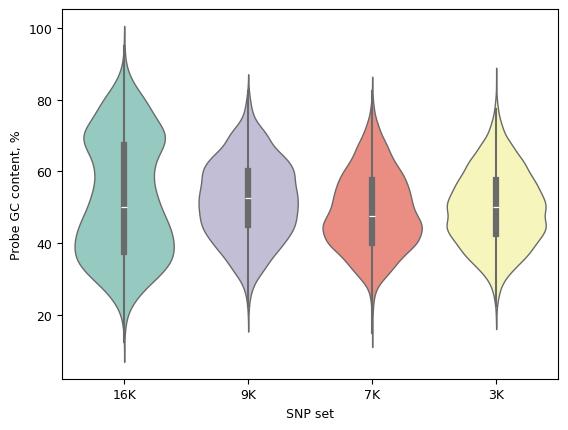

In [21]:
#! pip install seaborn
import seaborn as sns
import matplotlib.pyplot as plt

ax = sns.violinplot(data=df_all_probes, x="Set", y="GC%", inner="box", order=['16K', '9K', '7K', '3K'], hue='Set', bw_adjust=1, linewidth=1, palette="Set3", 
               density_norm='area')
ax.set_xlabel(r"SNP set")
ax.set_ylabel(r"Probe GC content, %")
plt.savefig('probe_GC_content.png', dpi=400)
plt.savefig('probe_GC_content.svg')

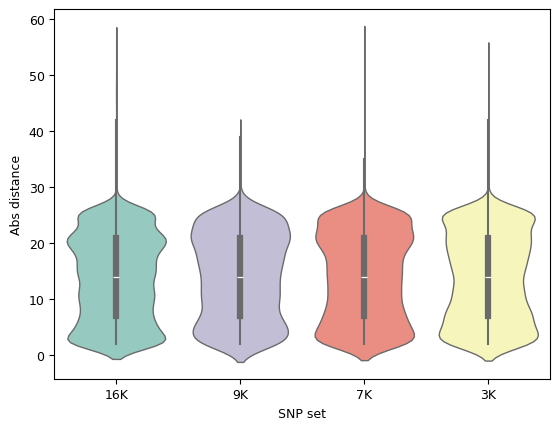

In [22]:
ax = sns.violinplot(data=df_all_probes, x="Set", y="Abs distance", inner="box", order=['16K', '9K', '7K', '3K'], hue='Set', bw_adjust=1, linewidth=1, palette="Set3", 
               density_norm='area')
ax.set_xlabel(r"SNP set")
plt.savefig('probe_distance.png', dpi=400)
plt.savefig('probe_distance.svg')

In [23]:
df_min_dist = df_all_probes.groupby('Name').aggregate({'Abs distance': 'min', 'Set': 'min'})
df_min_dist

,Abs distance,Set
Name,,
IAB00009,9,16K
IAB00012,10,3K
IAB00015,10,16K
IAB00016,24,16K
IAB00017,14,3K
...,...,...
IAB59982,7,7K
IAB59983,24,7K
IAB59987,7,3K


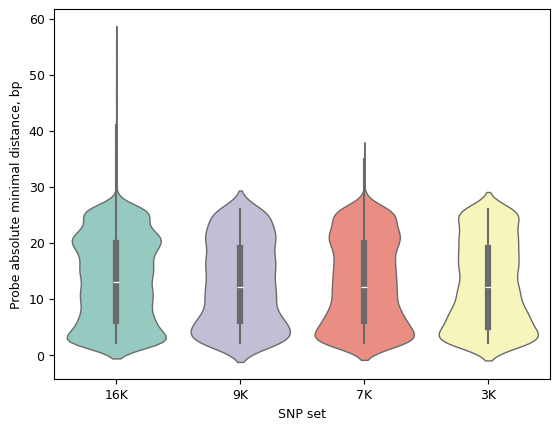

In [24]:
ax = sns.violinplot(data=df_min_dist, x="Set", y="Abs distance", inner="box", order=['16K', '9K', '7K', '3K'], hue='Set', bw_adjust=1, linewidth=1, palette="Set3", 
               density_norm='area')
ax.set_xlabel(r"SNP set")
ax.set_ylabel(r"Probe absolute minimal distance, bp")
plt.savefig('probe_distance_min.png', dpi=400)
plt.savefig('probe_distance_min.svg')

Now we will try to make plots with homogenous groups according to U-test:

In [ ]:
# ! pip install scipy
# ! pip install statsmodels

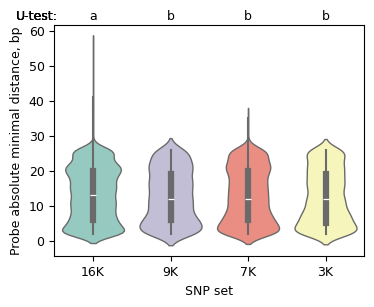

In [2]:
# importing libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import mannwhitneyu
from statsmodels.stats.multitest import multipletests


# prepare the data
df_all_probes = pd.read_excel('probes_with_distances_set_GC_content.xlsx')
df_min_dist = df_all_probes.groupby('Name').aggregate({'Abs distance': 'min', 'Set': 'min'})

# indicate dataset, trait, grouping trait and groups list for group labels calculation
df = df_min_dist
trait = 'Abs distance'
grouping_trait = 'Set'
groups = ['16K', '9K', '7K', '3K']

# calculating grouping labels
l = len(groups)
p_values = np.zeros([l, l])

for i, group1 in enumerate(groups):
        for j, group2 in enumerate(groups):
            _, p_values[i, j] = mannwhitneyu(df[trait][df[grouping_trait] == group1], df[trait][df[grouping_trait] == group2])

_, bonf_corr_pvals, _, _ = multipletests(p_values.flatten(), method='fdr_bh')
bonf_corr_pvals = bonf_corr_pvals.reshape(p_values.shape)
bonf_corr_pvals

# Define significance level
alpha = 0.05

# Initialize group labels
n_groups = p_values.shape[0]
group_labels = [''] * n_groups

# Create homogeneous groups
for i in range(n_groups):
    for j in range(i + 1, n_groups):
        if p_values[i, j] > alpha:
            # If groups i and j are not significantly different, assign them the same label
            if not group_labels[i]:
                group_labels[i] = chr(65 + i)  # Assign a letter if not already assigned
            if not group_labels[j]:
                group_labels[j] = group_labels[i]  # Assign the same letter

# Fill in any missing labels with unique identifiers
used_labels = set(group_labels)
next_label = ord('A')
for i in range(n_groups):
    if not group_labels[i]:
        while chr(next_label) in used_labels:
            next_label += 1
        group_labels[i] = chr(next_label)
        used_labels.add(chr(next_label))

# print("Group labels:", group_labels)

# set size of plot and font
plt.rcParams.update({'font.size': 9})
plt.figure(figsize=(4, 3))

ax = sns.violinplot(data=df, x=grouping_trait, y=trait, inner="box", order=groups, hue=grouping_trait, bw_adjust=1, linewidth=1, palette="Set3", 
               density_norm='area')

bottom, top = ax.get_ylim()
y_range = top - bottom
x_shift = -1

# adding group labels
for i, label in enumerate(group_labels):
    plt.text(x_shift + i + 1, top + y_range * 0.01, label.lower(), ha='center', va='bottom')
    plt.text(x_shift, top + y_range * 0.01, 'U-test:', ha='left', va='bottom')

# adding custom x and y axis labels
ax.set_xlabel(r"SNP set")
ax.set_ylabel(r"Probe absolute minimal distance, bp")

# show the result
# plt.show()

# save the results
plt.savefig('probe_distance_min_homogroups.png', dpi=400, bbox_inches='tight')
plt.savefig('probe_distance_min_homogroups.svg', bbox_inches='tight')

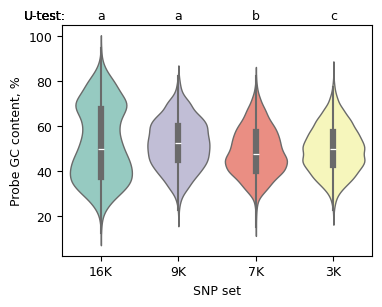

In [3]:
# importing libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import mannwhitneyu
from statsmodels.stats.multitest import multipletests


# prepare the data
df_all_probes = pd.read_excel('probes_with_distances_set_GC_content.xlsx')

# indicate dataset, trait, grouping trait and groups list for group labels calculation
df = df_all_probes
trait = 'GC%'
grouping_trait = 'Set'
groups = ['16K', '9K', '7K', '3K']

# calculating grouping labels
l = len(groups)
p_values = np.zeros([l, l])

for i, group1 in enumerate(groups):
        for j, group2 in enumerate(groups):
            _, p_values[i, j] = mannwhitneyu(df[trait][df[grouping_trait] == group1], df[trait][df[grouping_trait] == group2])

_, bonf_corr_pvals, _, _ = multipletests(p_values.flatten(), method='fdr_bh')
bonf_corr_pvals = bonf_corr_pvals.reshape(p_values.shape)
bonf_corr_pvals

# Define significance level
alpha = 0.05

# Initialize group labels
n_groups = p_values.shape[0]
group_labels = [''] * n_groups

# Create homogeneous groups
for i in range(n_groups):
    for j in range(i + 1, n_groups):
        if p_values[i, j] > alpha:
            # If groups i and j are not significantly different, assign them the same label
            if not group_labels[i]:
                group_labels[i] = chr(65 + i)  # Assign a letter if not already assigned
            if not group_labels[j]:
                group_labels[j] = group_labels[i]  # Assign the same letter

# Fill in any missing labels with unique identifiers
used_labels = set(group_labels)
next_label = ord('A')
for i in range(n_groups):
    if not group_labels[i]:
        while chr(next_label) in used_labels:
            next_label += 1
        group_labels[i] = chr(next_label)
        used_labels.add(chr(next_label))

# print("Group labels:", group_labels)

# set size of plot and font
plt.rcParams.update({'font.size': 9})
plt.figure(figsize=(4, 3))

ax = sns.violinplot(data=df, x=grouping_trait, y=trait, inner="box", order=groups, hue=grouping_trait, bw_adjust=1, linewidth=1, palette="Set3", 
               density_norm='area')

bottom, top = ax.get_ylim()
y_range = top - bottom
x_shift = -1

# adding group labels
for i, label in enumerate(group_labels):
    plt.text(x_shift + i + 1, top + y_range * 0.01, label.lower(), ha='center', va='bottom', c='k')
    plt.text(x_shift, top + y_range * 0.01, 'U-test:', ha='left', va='bottom', c='k')

# adding custom x and y axis labels
ax.set_xlabel(r"SNP set")
ax.set_ylabel(r"Probe GC content, %")

# show the result
# plt.show()

# save the results
plt.savefig('probes_GC%_homogroups.png', dpi=400, bbox_inches='tight')
plt.savefig('probes_GC%_homogroups.svg', bbox_inches='tight')

In [4]:
import pandas as pd
final_df = pd.read_excel('60K_snp_sequences_with_new_coords_+-50bp.xlsx')
final_df.head()

,Identifier,Reference,Position,Reference allele,Description code,Type,Sequences,GC%,Set,Matches_in_genome,RefSeq2.1_coordinates,Matches for SNP+-50bp
0,IAB15001,chr1A,508800,C,G_gap_SNP_other_4026,G,CAGTACGAATCAAGTTGTGCATATTTGCTGTTGGCATGAACCACAT...,46.766169,60K,1,Chr1A:508800,1
1,IAB30001,chr1A,799201,T,G_gap_SNP_OTHER_13922,G,CCAATCTAGGCACCCTTCAATGTCAACATTTCCATTAAAACTTGGG...,41.791045,60K,1,Chr1A:800459,1
2,IAB00001,chr1A,1145442,G,B_BS00000713_51.1_10.1186s12870-017-1167-3_ESM8,B,GATCTGAATCTGATGTGGGTTCAGGCCGGATCTGCCCCTTCTTGGA...,55.721393,60K,1,Chr1A:1143935,1
3,IAB30002,chr1A,1172042,C,D_Functional_SNP_MODERATE_7501,D,CTTAGTTTTTTTTCTTCCCATCACTCTGCATCTTATCTCTTGCCTG...,45.771144,16K,1,Chr1A:1169887,1
4,IAB30003,chr1A,1211885,C,D_Functional_SNP_MODERATE_7502,D,TTGTGGTTCTCCTTGCCCGCGCTTCCTTCAGAAGGATGATCTTCTT...,58.706468,3K,1,Chr1A:1209730,1


In [5]:
def gc_percent(seq):
    seq = seq.upper().replace('N', '')
    gc_count = 0
    
    for i in range(len(seq)):
        if seq[i] in ['G', 'C']:
            gc_count += 1
    
    gc_share = gc_count/len(seq)
    return(100 * gc_share)

In [6]:
# Calculating %GC for all sequences +-50bp around SNP
GC = []

for i in range(len(final_df)):
    probe_seq = final_df.iloc[i]['Sequences'].replace('[', '').replace(']', '')[50:-50]
    GC.append(gc_percent(probe_seq))

final_df[r'GC%50bp'] = GC
final_df.head()

,Identifier,Reference,Position,Reference allele,Description code,Type,Sequences,GC%,Set,Matches_in_genome,RefSeq2.1_coordinates,Matches for SNP+-50bp,GC%50bp
0,IAB15001,chr1A,508800,C,G_gap_SNP_other_4026,G,CAGTACGAATCAAGTTGTGCATATTTGCTGTTGGCATGAACCACAT...,46.766169,60K,1,Chr1A:508800,1,47.524752
1,IAB30001,chr1A,799201,T,G_gap_SNP_OTHER_13922,G,CCAATCTAGGCACCCTTCAATGTCAACATTTCCATTAAAACTTGGG...,41.791045,60K,1,Chr1A:800459,1,43.564356
2,IAB00001,chr1A,1145442,G,B_BS00000713_51.1_10.1186s12870-017-1167-3_ESM8,B,GATCTGAATCTGATGTGGGTTCAGGCCGGATCTGCCCCTTCTTGGA...,55.721393,60K,1,Chr1A:1143935,1,53.465347
3,IAB30002,chr1A,1172042,C,D_Functional_SNP_MODERATE_7501,D,CTTAGTTTTTTTTCTTCCCATCACTCTGCATCTTATCTCTTGCCTG...,45.771144,16K,1,Chr1A:1169887,1,47.524752
4,IAB30003,chr1A,1211885,C,D_Functional_SNP_MODERATE_7502,D,TTGTGGTTCTCCTTGCCCGCGCTTCCTTCAGAAGGATGATCTTCTT...,58.706468,3K,1,Chr1A:1209730,1,62.376238


In [7]:
final_df.to_excel('60K_snp_sequences_with_new_coords_+-50bp_gc.xlsx')

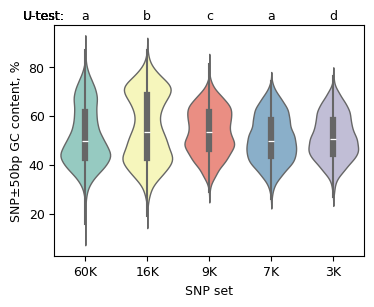

In [8]:
# importing libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import mannwhitneyu
from statsmodels.stats.multitest import multipletests


# prepare the data

# indicate dataset, trait, grouping trait and groups list for group labels calculation
df = final_df
trait = r'GC%50bp'
grouping_trait = 'Set'
groups = ['60K', '16K', '9K', '7K', '3K']

# calculating grouping labels
l = len(groups)
p_values = np.zeros([l, l])

for i, group1 in enumerate(groups):
        for j, group2 in enumerate(groups):
            _, p_values[i, j] = mannwhitneyu(df[trait][df[grouping_trait] == group1], df[trait][df[grouping_trait] == group2])

_, bonf_corr_pvals, _, _ = multipletests(p_values.flatten(), method='fdr_bh')
bonf_corr_pvals = bonf_corr_pvals.reshape(p_values.shape)
bonf_corr_pvals

# Define significance level
alpha = 0.05

# Initialize group labels
n_groups = p_values.shape[0]
group_labels = [''] * n_groups

# Create homogeneous groups
for i in range(n_groups):
    for j in range(i + 1, n_groups):
        if p_values[i, j] > alpha:
            # If groups i and j are not significantly different, assign them the same label
            if not group_labels[i]:
                group_labels[i] = chr(65 + i)  # Assign a letter if not already assigned
            if not group_labels[j]:
                group_labels[j] = group_labels[i]  # Assign the same letter

# Fill in any missing labels with unique identifiers
used_labels = set(group_labels)
next_label = ord('A')
for i in range(n_groups):
    if not group_labels[i]:
        while chr(next_label) in used_labels:
            next_label += 1
        group_labels[i] = chr(next_label)
        used_labels.add(chr(next_label))

# print("Group labels:", group_labels)

# set size of plot and font
plt.rcParams.update({'font.size': 9})
plt.figure(figsize=(4, 3))

ax = sns.violinplot(data=df, x=grouping_trait, y=trait, inner="box", order=groups, hue=grouping_trait, bw_adjust=1, linewidth=1, palette="Set3", 
               density_norm='area')

bottom, top = ax.get_ylim()
y_range = top - bottom
x_shift = -1

# adding group labels
for i, label in enumerate(group_labels):
    plt.text(x_shift + i + 1, top + y_range * 0.01, label.lower(), ha='center', va='bottom', c='k')
    plt.text(x_shift, top + y_range * 0.01, 'U-test:', ha='left', va='bottom', c='k')

# adding custom x and y axis labels
ax.set_xlabel(r"SNP set")
ax.set_ylabel(r"SNP±50bp GC content, %")

# show the result
# plt.show()

# save the results
plt.savefig('fragments_50bp_GC%_homogroups.png', dpi=400, bbox_inches='tight')
plt.savefig('fragmants_50bp_GC%_homogroups.svg', bbox_inches='tight')